In [3]:
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import os
parDir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
from matplotlib  import pyplot
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import cloudpickle

In [4]:
merDSDit = parDir + "\\DataSets\\MergedDataset\\Final.csv"
pickleDumpDir = parDir + "\\trained_models\\model_v1.pkl"

In [5]:
inputCols=['bookingID','Accuracy','Bearing','acceleration_x','acceleration_y',
           'acceleration_z','gyro_x','gyro_y','gyro_z','second','Speed']
targetCol='label'

In [6]:
df=pd.read_csv(merDSDit)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df[inputCols],df[targetCol],
                                                test_size=0.1,random_state=3)
#XGB Classifier
xgb1 = XGBClassifier(
 learning_rate=0.3,
 n_estimators=20,
 max_depth=20,
 verbosity=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.5,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scoring="roc_auc",
 n_jobs=-1,
 reg_alpha=1,
 )

In [6]:
bst=xgb1.fit(X_train, y_train,early_stopping_rounds=10,eval_set=[(X_test,y_test)],eval_metric='auc',verbose=True)


[21:41:19] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-auc:0.785913
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.807163
[2]	validation_0-auc:0.83535
[3]	validation_0-auc:0.851752
[4]	validation_0-auc:0.86375
[5]	validation_0-auc:0.86985
[6]	validation_0-auc:0.874936
[7]	validation_0-auc:0.880073
[8]	validation_0-auc:0.885799
[9]	validation_0-auc:0.887451
[10]	validation_0-auc:0.889853
[11]	validation_0-auc:0.894071
[12]	validation_0-auc:0.896884
[13]	validation_0-auc:0.901704
[14]	validation_0-auc:0.90616
[15]	validation_0-auc:0.908201
[16]	validation_0-auc:0.908526
[17]	validation_0-auc:0.908283
[18]	validation_0-auc:0.910806
[19]	validation_0-auc:0.913755


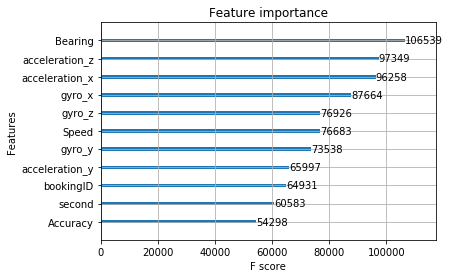

In [7]:
plot_importance(bst)
pyplot.show()

In [10]:
dtrain_prediction = xgb1.predict(X_train)
dtrain_predproba = xgb1.predict_proba(X_train)[:,1]

print(metrics.roc_auc_score(y_train,dtrain_predproba))
print(classification_report(y_train,pd.DataFrame(dtrain_prediction)))
print(confusion_matrix(y_train,pd.DataFrame(dtrain_prediction)))


dtest_prediction = xgb1.predict(X_test)
dtest_predproba =xgb1.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test,dtest_predproba))
print(classification_report(y_test,pd.DataFrame(dtest_prediction)))
print(confusion_matrix(y_test,pd.DataFrame(dtest_prediction)))

0.949649635891024
              precision    recall  f1-score   support

           0       0.86      0.89      0.88   4445533
           1       0.89      0.85      0.87   4444434

   micro avg       0.87      0.87      0.87   8889967
   macro avg       0.87      0.87      0.87   8889967
weighted avg       0.87      0.87      0.87   8889967

[[3976628  468905]
 [ 665461 3778973]]
0.9137545925895664
              precision    recall  f1-score   support

           0       0.81      0.85      0.83    493338
           1       0.84      0.81      0.82    494437

   micro avg       0.83      0.83      0.83    987775
   macro avg       0.83      0.83      0.83    987775
weighted avg       0.83      0.83      0.83    987775

[[419204  74134]
 [ 95853 398584]]


# As we can observe the auc still seems to be increasing on the validation set, so let us increase the number of rounds to 40 and check

In [11]:
#XGB Classifier
xgb2 = XGBClassifier(
 learning_rate=0.3,
 n_estimators=40,
 max_depth=20,
 verbosity=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.5,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scoring="roc_auc",
 n_jobs=-1,
 reg_alpha=1
 )

In [12]:
bst=xgb2.fit(X_train, y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)],eval_metric='auc',verbose=True)

[22:13:37] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-auc:0.785913
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.807163
[2]	validation_0-auc:0.83535
[3]	validation_0-auc:0.851752
[4]	validation_0-auc:0.86375
[5]	validation_0-auc:0.86985
[6]	validation_0-auc:0.874936
[7]	validation_0-auc:0.880073
[8]	validation_0-auc:0.885799
[9]	validation_0-auc:0.887451
[10]	validation_0-auc:0.889853
[11]	validation_0-auc:0.894071
[12]	validation_0-auc:0.896884
[13]	validation_0-auc:0.901704
[14]	validation_0-auc:0.90616
[15]	validation_0-auc:0.908201
[16]	validation_0-auc:0.908526
[17]	validation_0-auc:0.908283
[18]	validation_0-auc:0.910806
[19]	validation_0-auc:0.913755
[20]	validation_0-auc:0.914037
[21]	validation_0-auc:0.917274
[22]	validation_0-auc:0.91693
[23]	validation_0-auc:0.917184
[24]	validation_0-auc:0.919083
[25

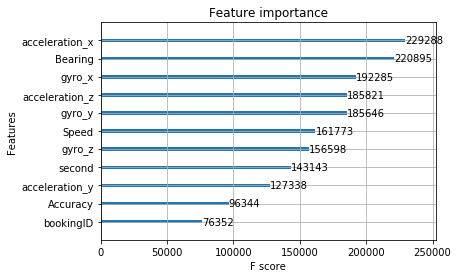

In [13]:
plot_importance(bst)
pyplot.show()

In [15]:
dtrain_prediction = xgb2.predict(X_train)
dtrain_predproba = xgb2.predict_proba(X_train)[:,1]

print(metrics.roc_auc_score(y_train,dtrain_predproba))
print(classification_report(y_train,pd.DataFrame(dtrain_prediction)))
print(confusion_matrix(y_train,pd.DataFrame(dtrain_prediction)))


dtest_prediction = xgb2.predict(X_test)
dtest_predproba =xgb2.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test,dtest_predproba))
print(classification_report(y_test,pd.DataFrame(dtest_prediction)))
print(confusion_matrix(y_test,pd.DataFrame(dtest_prediction)))

0.9797860817594273
              precision    recall  f1-score   support

           0       0.91      0.94      0.92   4445533
           1       0.93      0.91      0.92   4444434

   micro avg       0.92      0.92      0.92   8889967
   macro avg       0.92      0.92      0.92   8889967
weighted avg       0.92      0.92      0.92   8889967

[[4162781  282752]
 [ 399231 4045203]]
0.9362589337027037
              precision    recall  f1-score   support

           0       0.84      0.87      0.86    493338
           1       0.87      0.84      0.85    494437

   micro avg       0.85      0.85      0.85    987775
   macro avg       0.85      0.85      0.85    987775
weighted avg       0.85      0.85      0.85    987775

[[429085  64253]
 [ 79529 414908]]


#We will increase the n_estimators to 250 and early stopping rounds to 5 and then continue the process.

In [16]:
#XGB Classifier
xgb3 = XGBClassifier(
 learning_rate=0.3,
 n_estimators=250,
 max_depth=20,
 verbosity=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.5,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scoring="roc_auc",
 n_jobs=-1,
 reg_alpha=1
 )

In [17]:
bst3=xgb3.fit(X_train, y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)],eval_metric='auc',verbose=True)

[23:11:39] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-auc:0.785913
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.807163
[2]	validation_0-auc:0.83535
[3]	validation_0-auc:0.851752
[4]	validation_0-auc:0.86375
[5]	validation_0-auc:0.86985
[6]	validation_0-auc:0.874936
[7]	validation_0-auc:0.880073
[8]	validation_0-auc:0.885799
[9]	validation_0-auc:0.887451
[10]	validation_0-auc:0.889853
[11]	validation_0-auc:0.894071
[12]	validation_0-auc:0.896884
[13]	validation_0-auc:0.901704
[14]	validation_0-auc:0.90616
[15]	validation_0-auc:0.908201
[16]	validation_0-auc:0.908526
[17]	validation_0-auc:0.908283
[18]	validation_0-auc:0.910806
[19]	validation_0-auc:0.913755
[20]	validation_0-auc:0.914037
[21]	validation_0-auc:0.917274
[22]	validation_0-auc:0.91693
[23]	validation_0-auc:0.917184
[24]	validation_0-auc:0.919083
[25

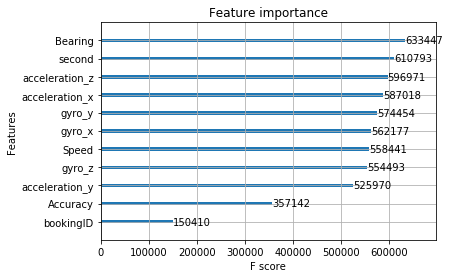

In [18]:
plot_importance(bst3)
pyplot.show()

In [19]:
dtrain_prediction = xgb3.predict(X_train)
dtrain_predproba = xgb3.predict_proba(X_train)[:,1]

print(metrics.roc_auc_score(y_train,dtrain_predproba))
print(classification_report(y_train,pd.DataFrame(dtrain_prediction)))
print(confusion_matrix(y_train,pd.DataFrame(dtrain_prediction)))


dtest_prediction = xgb3.predict(X_test)
dtest_predproba =xgb3.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test,dtest_predproba))
print(classification_report(y_test,pd.DataFrame(dtest_prediction)))
print(confusion_matrix(y_test,pd.DataFrame(dtest_prediction)))

0.9996825379793683
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   4445533
           1       0.99      0.99      0.99   4444434

   micro avg       0.99      0.99      0.99   8889967
   macro avg       0.99      0.99      0.99   8889967
weighted avg       0.99      0.99      0.99   8889967

[[4416761   28772]
 [  39403 4405031]]
0.963347025092008
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    493338
           1       0.90      0.89      0.89    494437

   micro avg       0.89      0.89      0.89    987775
   macro avg       0.89      0.89      0.89    987775
weighted avg       0.89      0.89      0.89    987775

[[444897  48441]
 [ 56575 437862]]


In [22]:
with open(pickleDumpDir, 'wb') as file:
    cloudpickle.dump(bst3,file)